In [6]:
import os, re
import torch
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc

from modules.models import Deep_RetiNet, DFC_LeNet_5




In [33]:
rc('font',
    weight='regular',
    family='Source Code Pro',
    size=15)

rc('figure', 
    dpi=108.79,
    titlesize=25,
    titleweight='heavy')

rc('image',
    cmap='gray')

rc('axes', 
    linewidth=1.5,
    titlesize=20,
    titleweight='regular',
    titlepad=20,
    labelsize=13,
    labelpad=10)

rc('xtick',
    labelsize=0)

rc('ytick',
    labelsize=0)

rc('legend',
    fontsize=12)


# some color defs
mainzGray = '#646464'
mainzRed = '#C1002B'
mainzBlue = '#005F73'
mainzOrange = '#BB3E03'
mainzGreen = '#94D2BD'
mainzYellow = '#EE9B00'

mainzColors = [
    mainzGray,
    mainzRed,
    mainzBlue,
    mainzYellow,
    mainzGreen
]

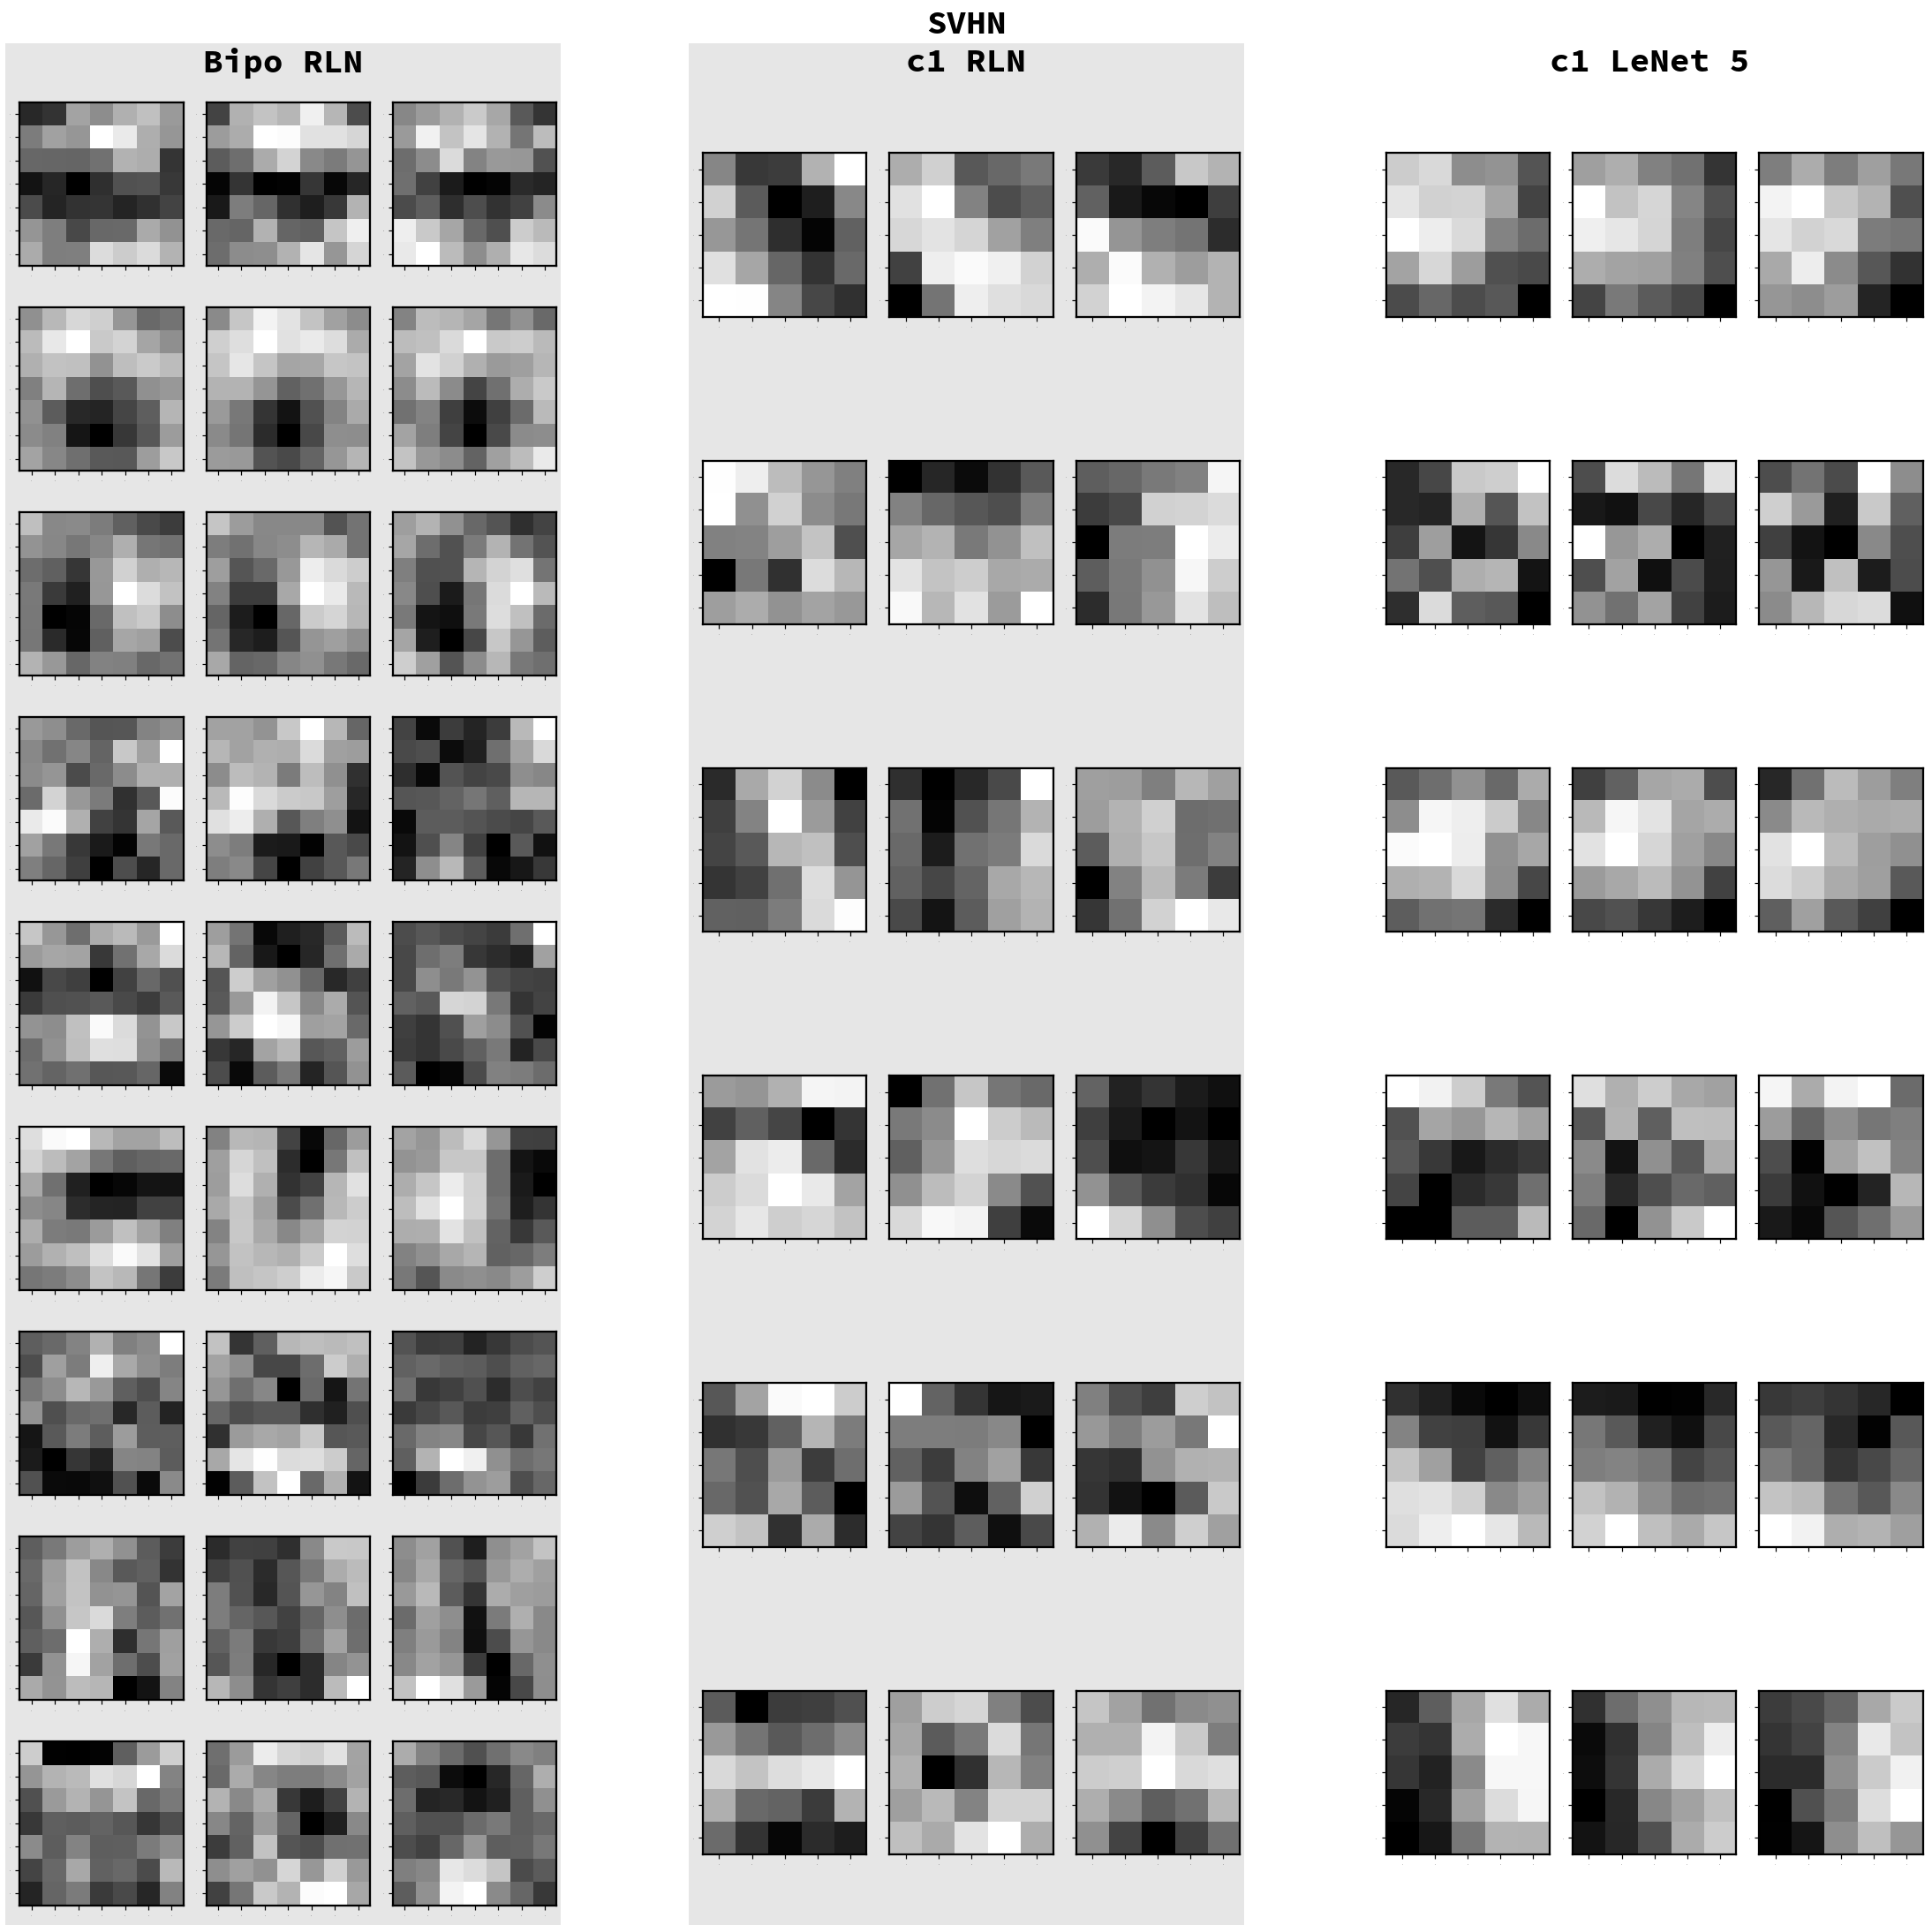

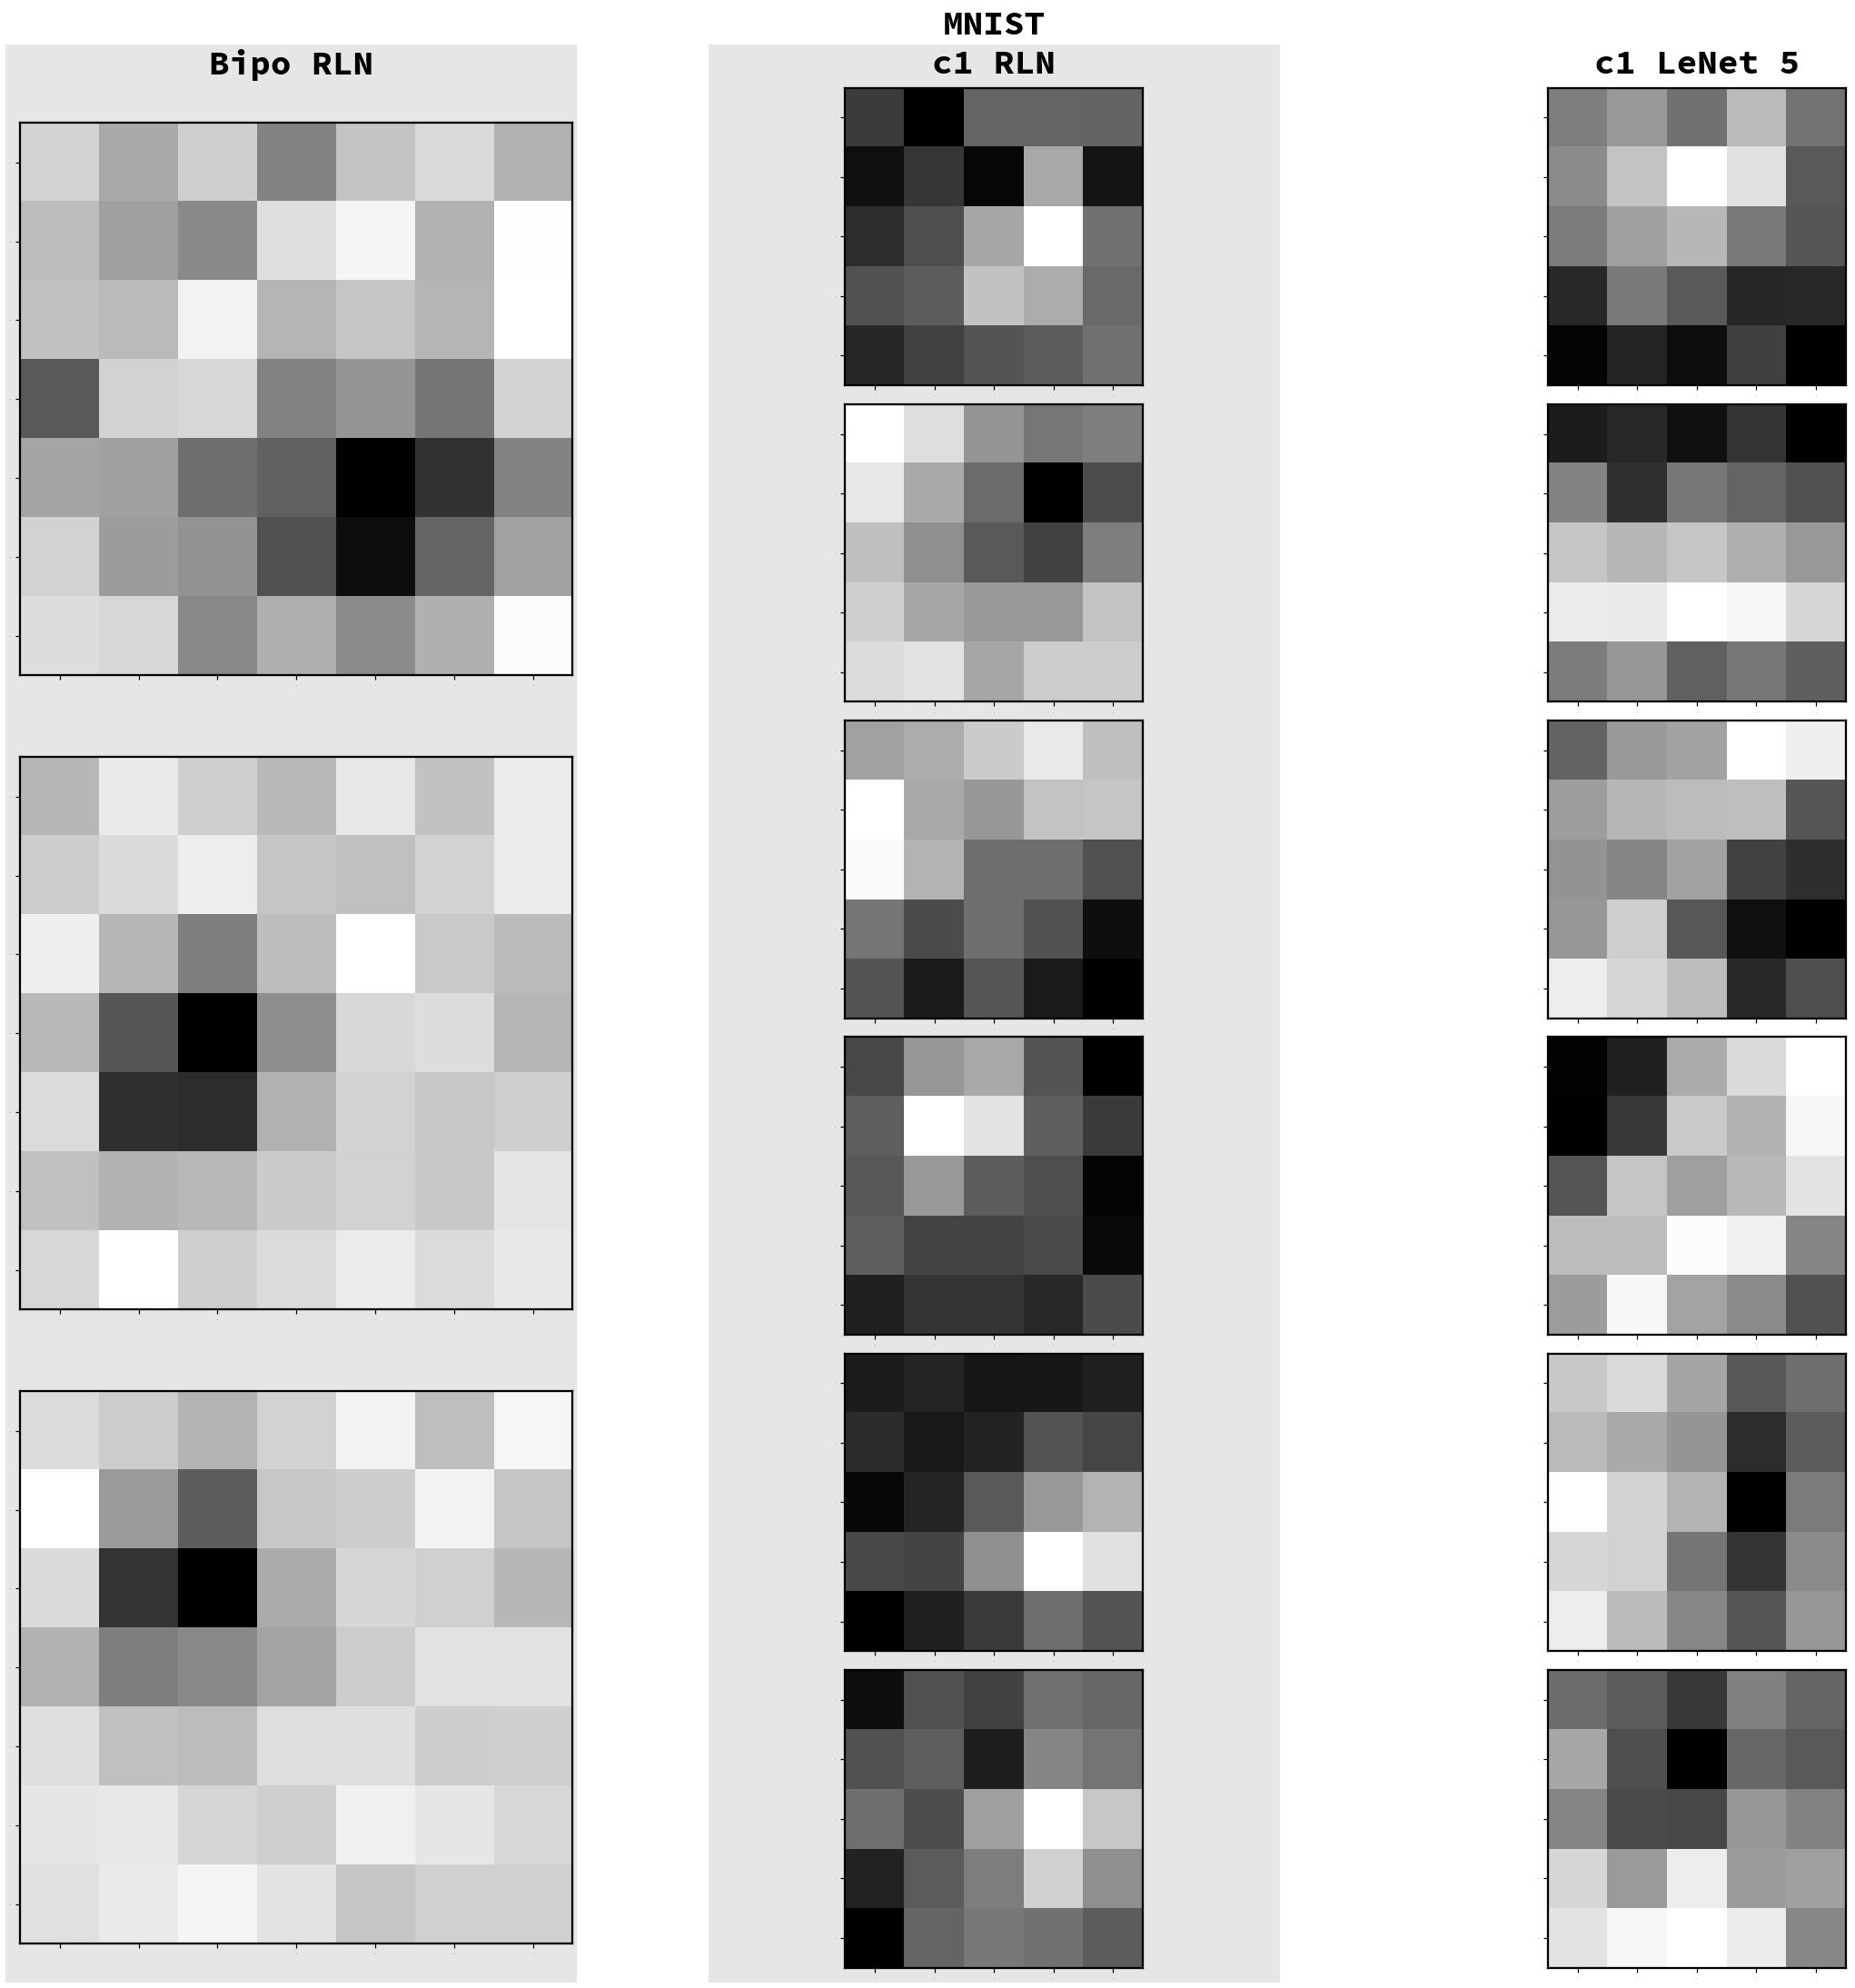

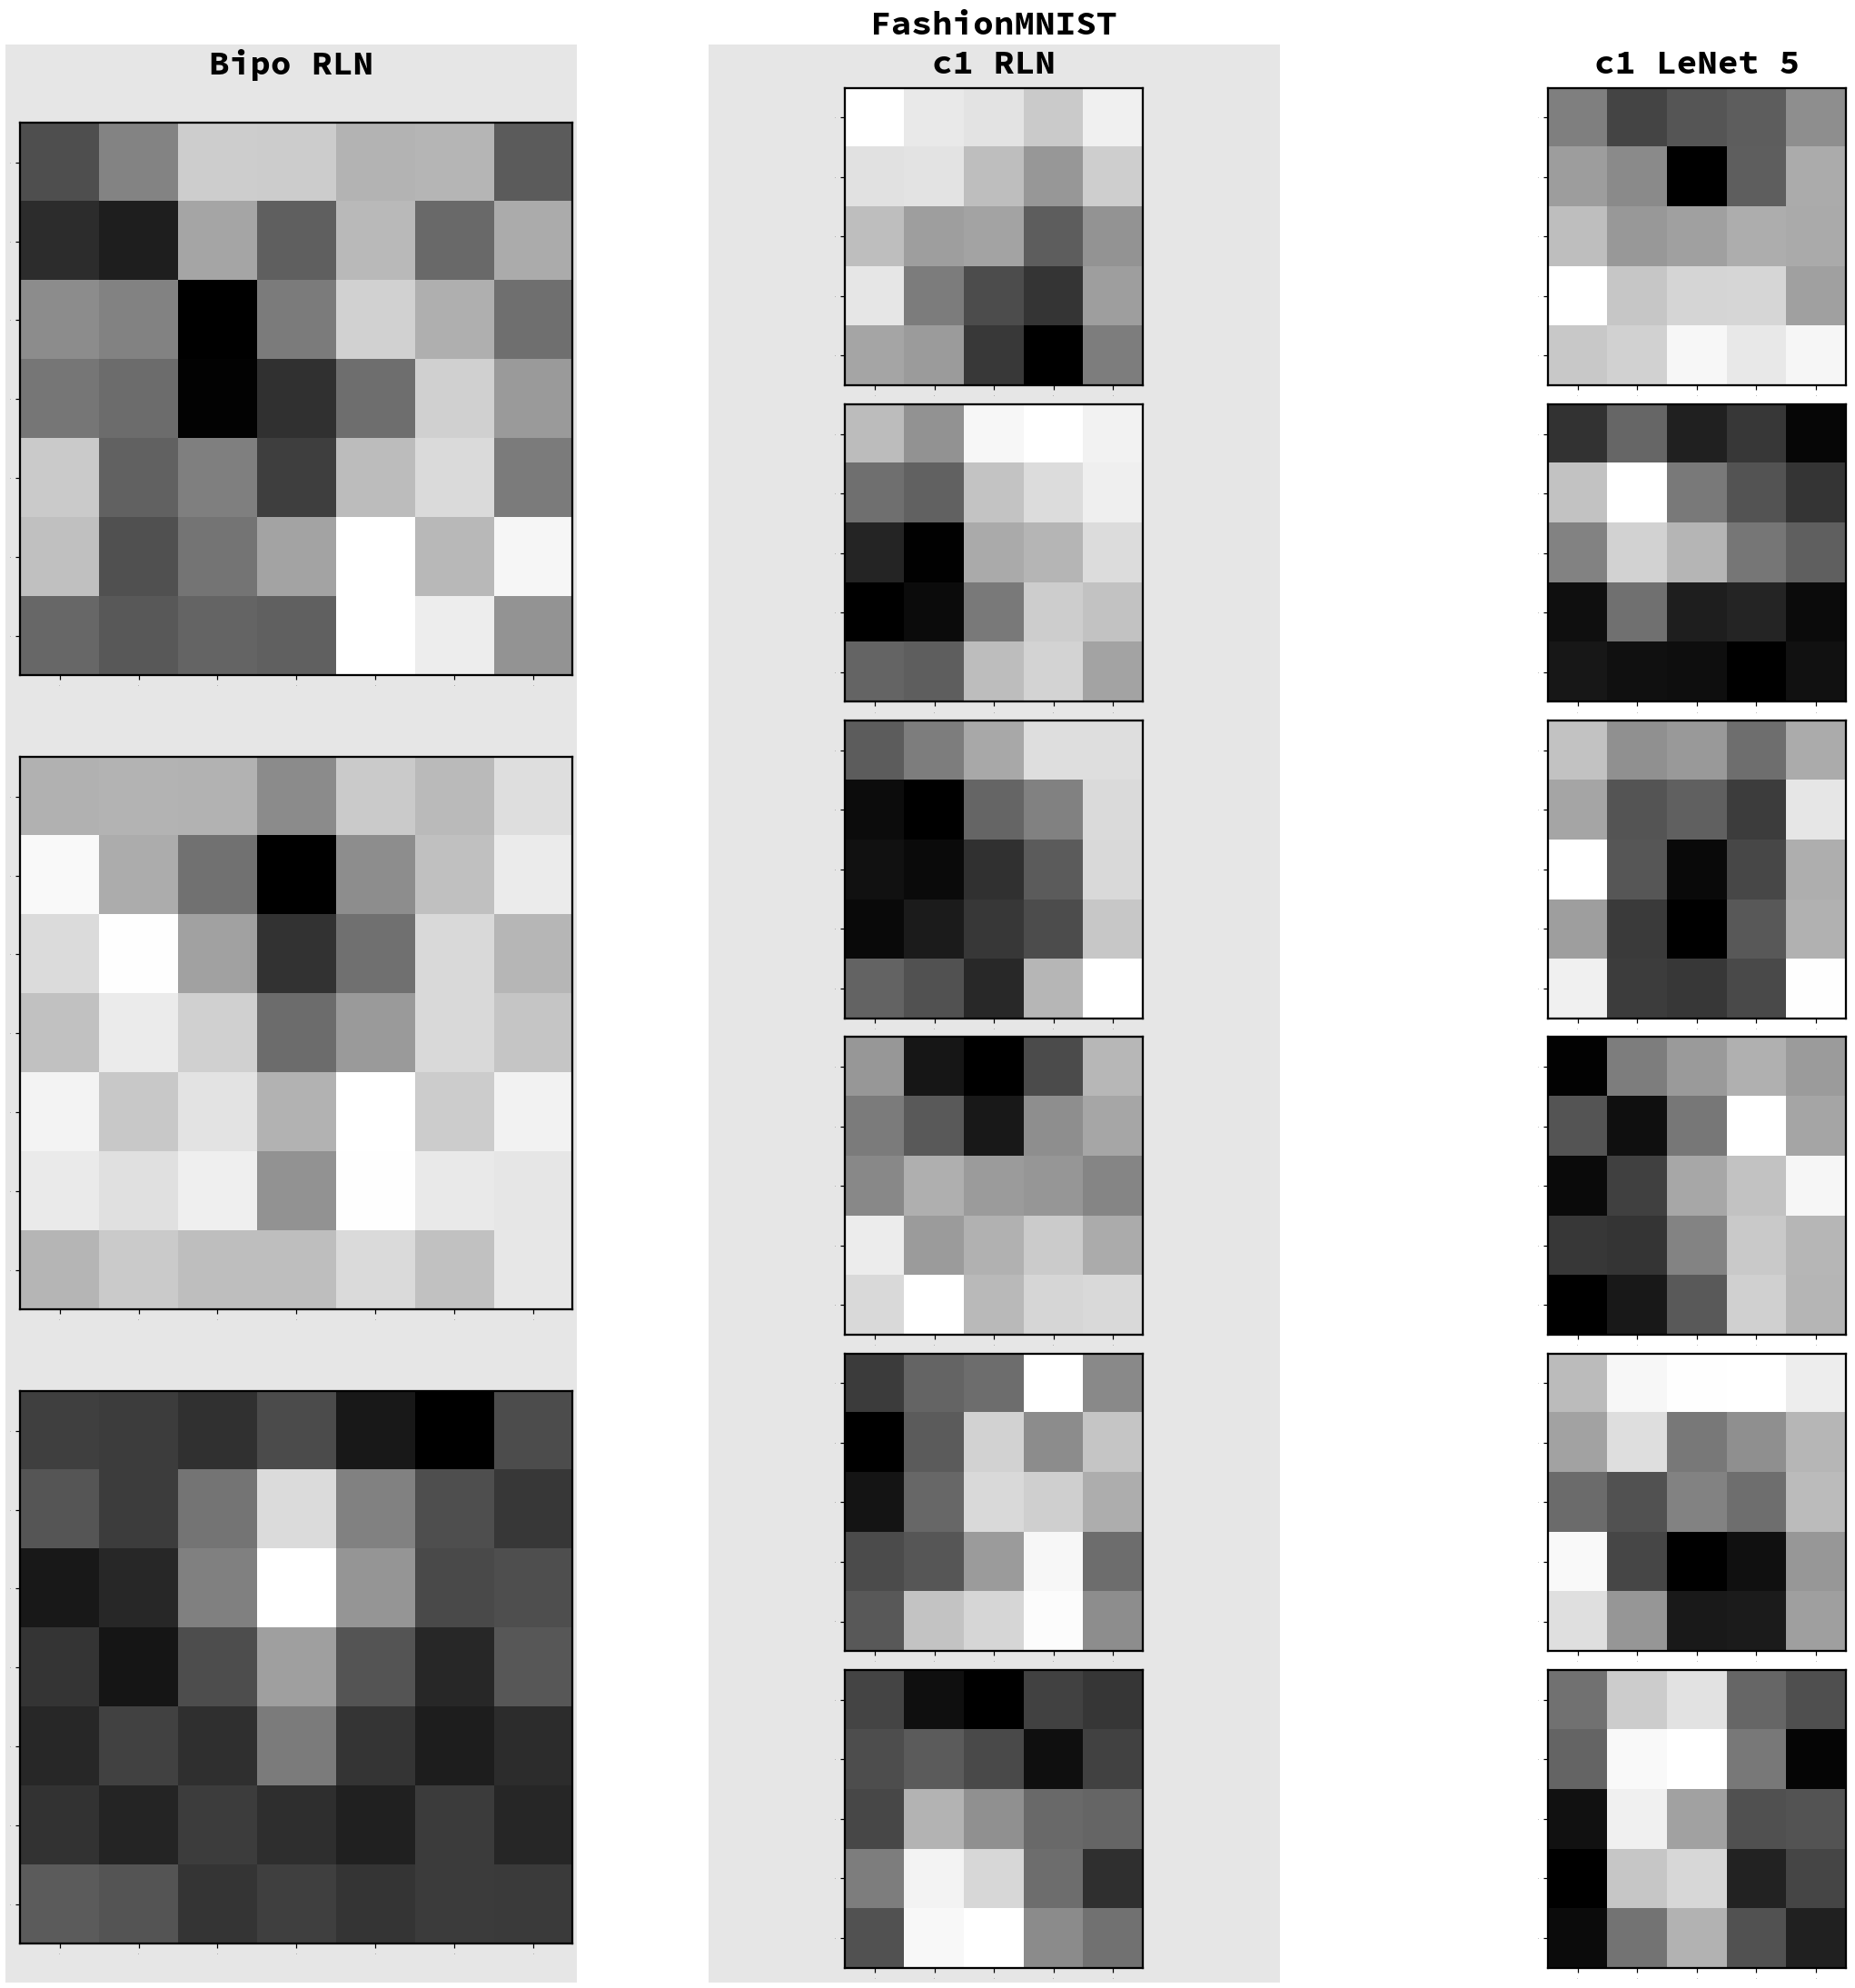

In [35]:
named_state_dicts = {
    'DFC_LeNet_5' : 'trained_DFC_LeNet_5_state_dict.pt',
    'Deep_RetiNet' : 'trained_Deep_RetiNet_d3_rks7_state_dict.pt'
}

depth = 3
rks = 7

for dataset in os.listdir('trained_models'):

    if 'SVHN' in dataset: in_channels = 3
    else: in_channels = 1

    fig = plt.figure(constrained_layout=True,figsize=(20,20))
    fig.suptitle(dataset)

    subfigs = fig.subfigures(1,3, wspace=0.2)

    rax = subfigs[0].subplots(in_channels*3, in_channels)
    lax = subfigs[1].subplots(6,in_channels)
    leax = subfigs[2].subplots(6,in_channels)

    subfigs[0].suptitle('Bipo RLN')
    subfigs[0].set_facecolor('0.9')
    subfigs[1].suptitle('c1 RLN')
    subfigs[1].set_facecolor('0.9')
    subfigs[2].suptitle('c1 LeNet 5')

    try:
        for model_name, state_dict in named_state_dicts.items():
            if 'RetiNet' in model_name:

                # create model, load state dicts
                model = eval(f"{model_name}(depth, rks, in_channels).to('cpu').eval()")

                state_dict_path = os.path.join('trained_models', dataset, state_dict)
                state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
                model.load_state_dict(state_dict)


                # plot the stuff    
                for name, child in model.named_children():

                    # print retinic convolutional layers
                    if 'retina' in name:

                        for rn, rch in child.named_children():

                            if isinstance(rch, torch.nn.Conv2d):

                                filter = rch.weight.detach().numpy()

                                try:
                                    for in_ch in range(in_channels):
                                        for out_ch in range(in_channels):
                                            rax[int(rn)+in_ch, out_ch].imshow(filter[in_ch, out_ch, :, :])

                                except:
                                    rax[int(rn)//3].imshow(filter[0,0,:,:])


                    # print lenet first convolutional layers
                    else:
                        filter = child.c1.weight.detach().numpy()
                        for row in range(6):

                            for col in range(in_channels):

                                try:
                                    lax[row, col].imshow(filter[row, col, :, :])
                                    
                                except:
                                    lax[row].imshow(filter[row, col, :, :])

            else:
                model = eval(f"{model_name}(in_channels).to('cpu').eval()")
                state_dict_path = os.path.join('trained_models', dataset, state_dict)
                state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
                model.load_state_dict(state_dict)

                filter = model.c1.weight.detach().numpy()

                for row in range(6):
                    for col in range(in_channels):
                        try:
                            leax[row, col].imshow(filter[row, col, :,:])
                        except:
                            leax[row].imshow(filter[row, col, :,:])



    except Exception as inst:
        print('qui', inst)
        continue
